In [85]:
# Sphere-Plane NN model

import matplotlib.pyplot as plt 
from math import exp
from random import seed
from random import random
from random import randint
import matplotlib.lines as lines 

import math
 
# Initialize a network


class neuron_s():
    
    def __init__(self, n_inputs,c,o):
        self.mode = "C"
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() for _ in range(n_inputs)]
        s1 = sum([x*x for x in self.weights])
        s2 = math.sqrt(s1)
        self.weights = [x /s2 for x in self.weights ]

        self.delta = 0
        self.output = 0
        self.A = .1 + 0.6*random()
        self.R = .1 + 0.6*random()
        self.C = c
    
    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        activation = - (y1 - 2*(self.A + self.R)*y2 + self.A*self.A + 2*self.A*self.R)*(1. + 1/max(self.R,0.01))        
        #activation = - (y1 - 2*(self.A + self.R)*y2 + self.A*self.A + 2*self.A*self.R)
        #print (self.weights, "C:", self.weights[0]*(self.A +self.R), self.weights[1]*(self.A +self.R), activation)
        return activation
    
    def transfer(self,activation):
        self.output = 1.0 / (1.0 + exp(-.5*activation)) 
        return self.output

    def transfer_derivative(self):
        return .5*self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return 2*self.inputs[idx] - 2*(self.A + self.R)*self.weights[idx]

    def activation_derivate_by_weight(self, idx):
        return  - 2*(self.A + self.R)*self.inputs[idx]

    def activation_derivate_by_A(self):
        N = len(self.inputs)
        s1 = sum([self.inputs[i]*self.weights[i] for i in range(N)])
        return -2*s1 + 2*(self.A + self.R)

    def activation_derivate_by_R(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.inputs[i] for i in range(N) ])
        y2 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        act = - (y1 - 2*(self.A + self.R)*y2 + self.A*self.A + 2*self.A*self.R)        
        s1 = sum([self.inputs[i]*self.weights[i] for i in range(N)])
        return (-2*s1 + 2*(self.A))*(1. + 1 / self.R) - act*1/(self.R**2)
        #s1 = sum([self.inputs[i]*self.weights[i] for i in range(N)])
        #return -2*s1 + 2*(self.A)

    
    def print_neuron_param(self):
        print(self.weights, self.A, self.R,self.C)

    def update_weights(self, l_rate):
        for j in range(len(self.weights)):
            self.weights[j] -= l_rate * self.delta * self.activation_derivate_by_weight(j)
        self.A -= l_rate * self.delta*self.activation_derivate_by_A()
        self.R -= 1.0*l_rate * self.delta*self.activation_derivate_by_R()
        s1 = sum([x*x for x in self.weights])
        s2 = math.sqrt(s1)
        self.weights = [x /s2 for x in self.weights ]
        
    def draw_neuron(self, axes, plt):
        cl = 'blue' if self.C > 0 else 'red'
        cc = plt.Circle( ((self.A+self.R)*self.weights[0], (self.A+self.R)*self.weights[1] ), self.R ,fill = False,color=cl )   
        axes.add_artist( cc)    
        
        
class neuron_l():
    
    def __init__(self, n_inputs,o):
        self.mode = "L"
        self.outlayer = o
        self.inputs = [0 for _ in range(n_inputs)]
        self.weights = [random() for _ in range(n_inputs)]
        self.delta = 0
        self.output = 0
        self.A = random()
    
    def activate(self):
        N = len(self.weights)
        y1 = sum([self.inputs[i]* self.weights[i] for i in range(N) ])
        activation = (y1  + self.A) 
        return activation
    
    def transfer(self,activation):
        self.output = 1.0 / (1.0 + exp(-activation)) 
        return self.output

    def transfer_derivative(self):
        return self.output * (1.0 - self.output)

    # Calculate the derivative of the activation function
    def activation_derivate_by_input(self, idx):
        return self.weights[idx]

    def activation_derivate_by_weight(self, idx):
        return  self.inputs[idx]

    def activation_derivate_by_A(self):
        return 1
    
    def print_neuron_param(self):
        print(self.weights, self.A)

    def update_weights(self, l_rate):
        for j in range(len(self.weights)):
            self.weights[j] += l_rate * self.delta * self.activation_derivate_by_weight(j)
        self.A += l_rate * self.delta*self.activation_derivate_by_A()

    def draw_neuron(self, axes, plt):
        cl = 'black"'
        x1 = -2
        y1 = (self.A - self.weights[0]*x1) / self.weights[1]
        x2 = 8
        y2 = (self.A - self.weights[0]*x2) / self.weights[1]
        line   = plt.Line2D([x1,x2],[y1,y2],mfc ='green')
        print ("line",[x1,x2],[y1,y2],"w",self.weights)
        plt.gca().add_line(line)    
        
        
class SSNN_network():
    
    def __init__ (self, n_inputs, hidden_nmode, outputs_nmode, outputs_category):
        self.layers = []
        n_outputs = len(outputs_nmode)
        n_hiddens = len(hidden_nmode)
        self.outputs = outputs_category
        self.HL = -1
        self.OL = 0
        self.layers.append([])
        if n_hiddens > 0:
            self.layers.append([])
            self.HL = 0
            self.OL = 1
            for i in range(n_hiddens):
                if hidden_nmode[i] == 'S': 
                    self.layers[self.HL].append(neuron_s(n_inputs,0,False))
                else:
                    self.layers[self.HL].append(neuron_l(n_inputs,False))
            for i in range(n_outputs):
                if outputs_nmode[i] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_hiddens,outputs_category[i],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_hiddens,True))
        else:
            for i in range(n_outputs):
                if outputs_nmode[i] == 'S': 
                    self.layers[self.OL].append(neuron_s(n_inputs,outputs_category[i],True))
                else:
                    self.layers[self.OL].append(neuron_l(n_inputs,True))
        
    def forward_propagate(self, row):
        for neuron in self.layers[0]:
            for i in range(len(row)-1):
                neuron.inputs[i] = row[i]

        for l in range(len(self.layers)):
            layer = self.layers[l]
            for neuron in layer:
                activation = neuron.activate()
                neuron.transfer(activation)
            if l < self.OL:
                for neuron in self.layers[l+1]:
                    for i in range(len(self.layers[l])):
                        neuron2 = self.layers[l][i]
                        neuron.inputs[i] = neuron2.output

            outputs = []
            for neuron in self.layers[self.OL]:
                outputs.append(neuron.output)
        return outputs
     
    
    def backward_propagate_error(self, expected):
        for i in reversed(range(len(self.layers))):
            layer = self.layers[i]
            errors = list()
            if i != self.OL:
                for j in range(len(layer)):
                    error = 0.0
                    for neuron in self.layers[i + 1]:
                        error += (neuron.activation_derivate_by_input(j) * neuron.delta)
                    errors.append(error)
            else:
                for j in range(len(layer)):
                    neuron = layer[j]
                    #exp = expected[j] if neuron["C"] == '0' else (1-expected[j])
                    exp = expected[j] 
                    errors.append(exp - neuron.output)
            for j in range(len(layer)):
                neuron = layer[j]
                neuron.delta = errors[j] * neuron.transfer_derivative()
                
    def update_weights(self, l_rate):
        for i in range(len(self.layers)):
            for neuron in self.layers[i]:
                neuron.update_weights(l_rate);
                

    def train_network(self, train, l_rate, n_epoch, drf = 5):
        train = self.normalize(train) 
        n_outputs = len(self.outputs)
        self.draw_network( train)
        self.print_network_param()
        for epoch in range(n_epoch):
            sum_error = 0
            for row in train:
                voutputs = self.forward_propagate( row)
                expected = [0 for i in range(n_outputs)]
                for i in range(n_outputs):
                    if self.outputs[i] == row[-1]:
                        expected[i] = 1
                sum_error += sum([(expected[i]-voutputs[i])**2 for i in range(len(expected))])
                self.backward_propagate_error( expected)
                self.update_weights(l_rate)
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
            if epoch % drf == 0:
                self.draw_network( train)
                self.print_network_param()
            #self.update_w()
              
            
    def draw_network (self, train):
        figure, axes = plt.subplots()
        axes.set_aspect( 1 )
        for i in range(len(self.layers[self.OL])):
            sn = self.layers[self.OL][i]
            sn.draw_neuron(axes, plt)
        for i in range(len(train)):
            cl = 'blue' if train[i][2] > 0 else 'red'
            cc = plt.Circle( (train[i][0], train[i][1] ), 0.03 ,fill = True, color =cl )   
            axes.add_artist( cc)        

        plt.xlim( -1 ,2 ) 
        plt.ylim( -1 ,2) 
        plt.title( 'Circle' ) 
        plt.show()            
                
    def print_network_param(self):
        for layer in self.layers:
            print ("Layer ---------------")
            for neuron in layer:
                neuron.print_neuron_param()
                
    def normalize (self, train):
        mx = []
        mn = []
        for i in range(len(train[0])-1):
            mx.append(max([x[i] for x in train ]))
            mn.append(min([x[i] for x in train ]))
        for row in train:
            for i in range(len(row)-1):
                row[i] = (row[i] - mn[i]) / (mx[i] - mn[i]) 
        return train
    
    def test_network(self, train):
        train = self.normalize(train)
        n_outputs = len(self.outputs)
        dbok = 0
        for row in train:
            voutputs = self.forward_propagate( row)
            expected = [0 for i in range(n_outputs)]
            idx = voutputs.index(max(voutputs))
            if self.outputs[idx] == row[-1]:
                dbok += 1
            print (row, voutputs)
        print ("accuray:", dbok / len(train))
        
    def update_w (self):
        for layer in self.layers:
            upds = []
            for n1  in range(len(layer)):
                for n2 in range(len(layer)):
                    if n1 == n2 or layer[n1].mode != layer[n2].mode:
                        continue
                    N = len(layer[n1].weights)
                    d1 = sum ([ (layer[n1].weights[i] - layer[n2].weights[i])**2  for i in range(N) ])
                    if d1 > .3 :
                        continue
                    d2 = (layer[n1].A - layer[n2].A)**2
                    if d2 > .3 :
                        continue                
                    if layer[n1].mode == 'C':
                        d3 = (layer[n1].A - layer[n2].A)**2
                        if d3 > .3:
                            continue
                    upds.append(n2)
                    
            for n in upds:
                #print ("+++++++++++++++++++++++++++++++++++++++++++")
                N = len(layer[n].weights)
                for i in range(N):
                    layer[n].weights[i] = random()
                s1 = sum([x*x for x in layer[n].weights])
                s2 = math.sqrt(s1)
                layer[n].weights = [x /s2 for x in layer[n].weights ]
                layer[n].A = 0.1 + 0.6*random() 
                layer[n].R = 0.1 + 1*random()
                

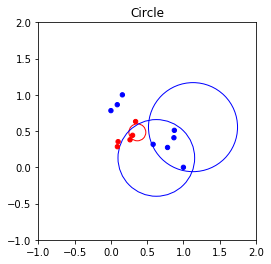

Layer ---------------
[0.602726708931572, 0.7979476889749829] 0.487930247236418 0.1169467298901888 0
[0.9792146919912273, 0.20282649478932926] 0.11063211609910531 0.5288993967899326 1
[0.8981652598890796, 0.4396580101947217] 0.646541284996403 0.614257968585881 1
>epoch=0, lrate=0.050, error=8.911


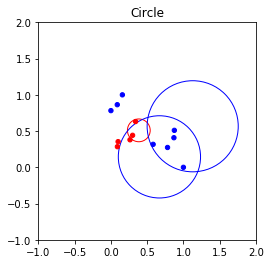

Layer ---------------
[0.602224271782525, 0.7983269546219817] 0.48178704265517003 0.15706599148508776 0
[0.977538849028555, 0.21075530512878632] 0.1172674436746283 0.5672138957809567 1
[0.8936839806557534, 0.4486969386114499] 0.6337784794267254 0.6284155818680418 1
>epoch=1, lrate=0.050, error=9.007
>epoch=2, lrate=0.050, error=8.982
>epoch=3, lrate=0.050, error=8.922
>epoch=4, lrate=0.050, error=8.851
>epoch=5, lrate=0.050, error=8.777
>epoch=6, lrate=0.050, error=8.704
>epoch=7, lrate=0.050, error=8.633
>epoch=8, lrate=0.050, error=8.564
>epoch=9, lrate=0.050, error=8.498
>epoch=10, lrate=0.050, error=8.435


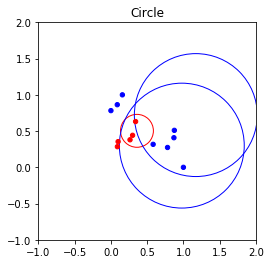

Layer ---------------
[0.5804823571157043, 0.8142728247199436] 0.3912797644512422 0.22702457743743568 0
[0.9561699453887601, 0.29281228719993174] 0.1611612801662353 0.8615169798685843 1
[0.8516624165566263, 0.5240907633463192] 0.5272323611103713 0.8479604660306089 1
>epoch=11, lrate=0.050, error=8.375
>epoch=12, lrate=0.050, error=8.317
>epoch=13, lrate=0.050, error=8.262
>epoch=14, lrate=0.050, error=8.209
>epoch=15, lrate=0.050, error=8.158
>epoch=16, lrate=0.050, error=8.109
>epoch=17, lrate=0.050, error=8.063
>epoch=18, lrate=0.050, error=8.018
>epoch=19, lrate=0.050, error=7.975
>epoch=20, lrate=0.050, error=7.933


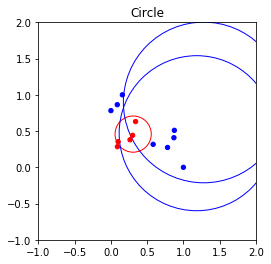

Layer ---------------
[0.5561594233657899, 0.8310756258015464] 0.3017924935056731 0.24980832605744346 0
[0.9291390778199627, 0.3697304072805875] 0.2037490197620399 1.0695194963675843 1
[0.8195887126059122, 0.572952303572456] 0.4535475582027469 1.1082832662808275 1
>epoch=21, lrate=0.050, error=7.893
>epoch=22, lrate=0.050, error=7.855
>epoch=23, lrate=0.050, error=7.818
>epoch=24, lrate=0.050, error=7.782
>epoch=25, lrate=0.050, error=7.747
>epoch=26, lrate=0.050, error=7.713
>epoch=27, lrate=0.050, error=7.681
>epoch=28, lrate=0.050, error=7.649
>epoch=29, lrate=0.050, error=7.618
>epoch=30, lrate=0.050, error=7.588


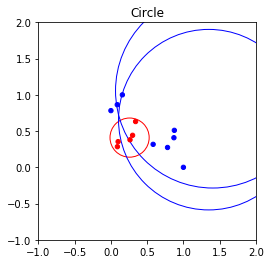

Layer ---------------
[0.5316750167402149, 0.8469484497738291] 0.21414335269360335 0.2701080836372356 0
[0.8990336831018586, 0.4378794773088901] 0.2563543455670268 1.2452824509546996 1
[0.7993831211133682, 0.600821625508811] 0.41620382283177315 1.3420656682242986 1
>epoch=31, lrate=0.050, error=7.559
>epoch=32, lrate=0.050, error=7.531
>epoch=33, lrate=0.050, error=7.503
>epoch=34, lrate=0.050, error=7.476
>epoch=35, lrate=0.050, error=7.450
>epoch=36, lrate=0.050, error=7.424
>epoch=37, lrate=0.050, error=7.399
>epoch=38, lrate=0.050, error=7.375
>epoch=39, lrate=0.050, error=7.351
>epoch=40, lrate=0.050, error=7.327


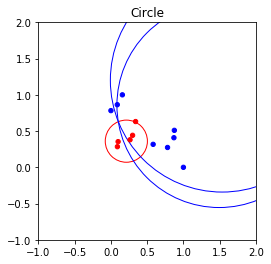

Layer ---------------
[0.5076352185838677, 0.8615721007862945] 0.12791762627862813 0.2907441054234964 0
[0.8675657734562, 0.49732245950423876] 0.3108444663872242 1.41122414978541 1
[0.7874668435649445, 0.6163570152808057] 0.4064713321686126 1.5427199456842164 1
>epoch=41, lrate=0.050, error=7.304
>epoch=42, lrate=0.050, error=7.282
>epoch=43, lrate=0.050, error=7.260
>epoch=44, lrate=0.050, error=7.239
>epoch=45, lrate=0.050, error=7.218
>epoch=46, lrate=0.050, error=7.197
>epoch=47, lrate=0.050, error=7.177
>epoch=48, lrate=0.050, error=7.158
>epoch=49, lrate=0.050, error=7.139
>epoch=50, lrate=0.050, error=7.120


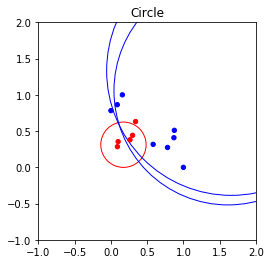

Layer ---------------
[0.4844922915411253, 0.8747955300738735] 0.04343137137923926 0.312763148452942 0
[0.8372671999653671, 0.5467939610695731] 0.3562600310931448 1.5742514603310953 1
[0.7798789092872316, 0.6259304169386227] 0.40963038018473913 1.7195887078393983 1
>epoch=51, lrate=0.050, error=7.102
>epoch=52, lrate=0.050, error=7.085
>epoch=53, lrate=0.050, error=7.068
>epoch=54, lrate=0.050, error=7.051
>epoch=55, lrate=0.050, error=7.034
>epoch=56, lrate=0.050, error=7.019
>epoch=57, lrate=0.050, error=7.003
>epoch=58, lrate=0.050, error=6.988
>epoch=59, lrate=0.050, error=6.973
>epoch=60, lrate=0.050, error=6.959


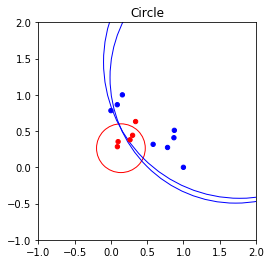

Layer ---------------
[0.46260932538094424, 0.8865622437655394] -0.03873368356362227 0.3362630616033178 0
[0.8114655469026515, 0.5844002619694659] 0.3875509543393959 1.7334536974676142 1
[0.7744052749586551, 0.6326898688269078] 0.41605290180187543 1.880150859030533 1
>epoch=61, lrate=0.050, error=6.944
>epoch=62, lrate=0.050, error=6.931
>epoch=63, lrate=0.050, error=6.917
>epoch=64, lrate=0.050, error=6.904
>epoch=65, lrate=0.050, error=6.891
>epoch=66, lrate=0.050, error=6.879
>epoch=67, lrate=0.050, error=6.867
>epoch=68, lrate=0.050, error=6.855
>epoch=69, lrate=0.050, error=6.843
>epoch=70, lrate=0.050, error=6.832


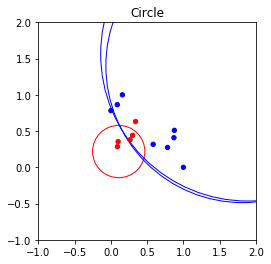

Layer ---------------
[0.4422789358714314, 0.8968775517786329] -0.11805218280950971 0.36090560076648887 0
[0.7922204203961385, 0.6102350411991806] 0.4067168507260834 1.8863003928198223 1
[0.7701289879751491, 0.6378881891682685] 0.42216433713027746 2.028540515084702 1
>epoch=71, lrate=0.050, error=6.821
>epoch=72, lrate=0.050, error=6.810
>epoch=73, lrate=0.050, error=6.799
>epoch=74, lrate=0.050, error=6.789
>epoch=75, lrate=0.050, error=6.778
>epoch=76, lrate=0.050, error=6.768
>epoch=77, lrate=0.050, error=6.759
>epoch=78, lrate=0.050, error=6.749
>epoch=79, lrate=0.050, error=6.740
>epoch=80, lrate=0.050, error=6.730


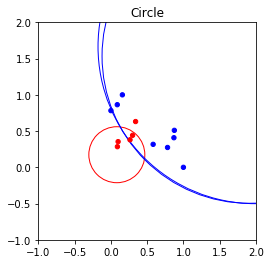

Layer ---------------
[0.4237367668709972, 0.9057853787745275] -0.19418797822528797 0.3862276072032097 0
[0.7792739447613783, 0.626683428068782] 0.4182632411241522 2.0313996330727866 1
[0.7666616163301051, 0.6420513733698503] 0.42730396873380205 2.1671562641632907 1
>epoch=81, lrate=0.050, error=6.721
>epoch=82, lrate=0.050, error=6.712
>epoch=83, lrate=0.050, error=6.704
>epoch=84, lrate=0.050, error=6.695
>epoch=85, lrate=0.050, error=6.687
>epoch=86, lrate=0.050, error=6.679
>epoch=87, lrate=0.050, error=6.670
>epoch=88, lrate=0.050, error=6.663
>epoch=89, lrate=0.050, error=6.655
>epoch=90, lrate=0.050, error=6.647


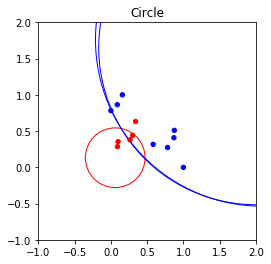

Layer ---------------
[0.40717334726764876, 0.9133508993124486] -0.2670020844300532 0.4117964215528403 0
[0.7710119718503575, 0.6368206492124949] 0.4256894579337228 2.168619301226824 1
[0.7637804537962105, 0.645476117605334] 0.4315887787259456 2.2976102438484878 1
>epoch=91, lrate=0.050, error=6.639
>epoch=92, lrate=0.050, error=6.632
>epoch=93, lrate=0.050, error=6.625
>epoch=94, lrate=0.050, error=6.618
>epoch=95, lrate=0.050, error=6.610
>epoch=96, lrate=0.050, error=6.604
>epoch=97, lrate=0.050, error=6.597
>epoch=98, lrate=0.050, error=6.590
>epoch=99, lrate=0.050, error=6.583
>epoch=100, lrate=0.050, error=6.577


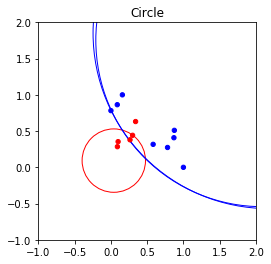

Layer ---------------
[0.3927426563740143, 0.9196484142672584] -0.33650898723248185 0.4372691628449781 0
[0.7657209838771065, 0.6431728965451482] 0.43093603082452475 2.2984816911588815 1
[0.7613305911788842, 0.6483638877476219] 0.4352139543685122 2.421095133696377 1
>epoch=101, lrate=0.050, error=6.570
>epoch=102, lrate=0.050, error=6.564
>epoch=103, lrate=0.050, error=6.558
>epoch=104, lrate=0.050, error=6.551
>epoch=105, lrate=0.050, error=6.545
>epoch=106, lrate=0.050, error=6.539
>epoch=107, lrate=0.050, error=6.534
>epoch=108, lrate=0.050, error=6.528
>epoch=109, lrate=0.050, error=6.522
>epoch=110, lrate=0.050, error=6.516


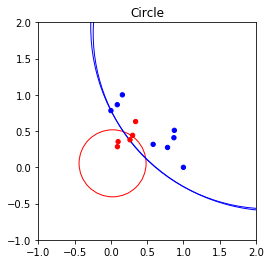

Layer ---------------
[0.38056708145233964, 0.9247533165741274] -0.40282589753359027 0.46240237779278165 0
[0.7621472973687451, 0.6474036585574083] 0.43496123465743675 2.4217144865691655 1
[0.7592026134917078, 0.650854355188133] 0.43832987030923565 2.5385354197119225 1
>epoch=111, lrate=0.050, error=6.511
>epoch=112, lrate=0.050, error=6.505
>epoch=113, lrate=0.050, error=6.500
>epoch=114, lrate=0.050, error=6.494
>epoch=115, lrate=0.050, error=6.489
>epoch=116, lrate=0.050, error=6.484
>epoch=117, lrate=0.050, error=6.479
>epoch=118, lrate=0.050, error=6.473
>epoch=119, lrate=0.050, error=6.468
>epoch=120, lrate=0.050, error=6.463


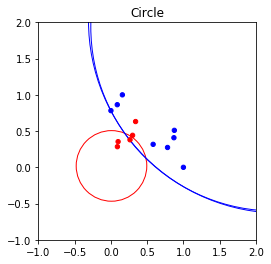

Layer ---------------
[0.3707397760315643, 0.9287367864298611] -0.4661323018513237 0.48704074537321745 0
[0.7595271368503685, 0.6504756170586884] 0.43823909289153024 2.5390439006008685 1
[0.7573209473865343, 0.6530428643278803] 0.4410437532285399 2.650667257477748 1
>epoch=121, lrate=0.050, error=6.458
>epoch=122, lrate=0.050, error=6.454
>epoch=123, lrate=0.050, error=6.449
>epoch=124, lrate=0.050, error=6.444
>epoch=125, lrate=0.050, error=6.439
>epoch=126, lrate=0.050, error=6.435
>epoch=127, lrate=0.050, error=6.430
>epoch=128, lrate=0.050, error=6.426
>epoch=129, lrate=0.050, error=6.421
>epoch=130, lrate=0.050, error=6.417


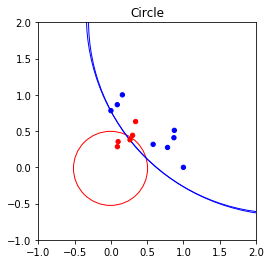

Layer ---------------
[0.3633256800865605, 0.9316621974673214] -0.5266424181511344 0.5110996842263024 0
[0.7574416468016136, 0.6529028654328755] 0.44101596318315234 2.651122568577223 1
[0.7556336361326685, 0.6549945098586109] 0.4434331594841081 2.7580885648879305 1
>epoch=131, lrate=0.050, error=6.412
>epoch=132, lrate=0.050, error=6.408
>epoch=133, lrate=0.050, error=6.404
>epoch=134, lrate=0.050, error=6.399
>epoch=135, lrate=0.050, error=6.395
>epoch=136, lrate=0.050, error=6.391
>epoch=137, lrate=0.050, error=6.387
>epoch=138, lrate=0.050, error=6.383
>epoch=139, lrate=0.050, error=6.379
>epoch=140, lrate=0.050, error=6.375


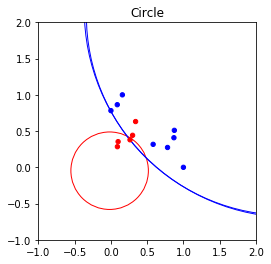

Layer ---------------
[0.35836214380914927, 0.9335826550897948] -0.5845878955452554 0.5345483332447422 0
[0.7556742491460472, 0.6549476537690306] 0.443428595926852 2.7585140710658687 1
[0.7541043025544636, 0.656754673275224] 0.44555574968791123 2.8612929623417487 1
>epoch=141, lrate=0.050, error=6.371
>epoch=142, lrate=0.050, error=6.367
>epoch=143, lrate=0.050, error=6.363
>epoch=144, lrate=0.050, error=6.359
>epoch=145, lrate=0.050, error=6.355
>epoch=146, lrate=0.050, error=6.351
>epoch=147, lrate=0.050, error=6.347
>epoch=148, lrate=0.050, error=6.344
>epoch=149, lrate=0.050, error=6.340
[0.26336117237621176, 0.37991369788219237, 0] [0.5058455411890843, 0.5004444909648021, 0.4989169744329203]
[0.09894605491896306, 0.35428162494463916, 0] [0.5378210864343912, 0.3606683540083795, 0.35622699606009484]
[0.3402799517210561, 0.6315596257493117, 0] [0.38776417724638285, 0.6883969419021021, 0.6923760332012366]
[0.08927066745445217, 0.2846407039653182, 0] [0.5576744160406635, 0.314902651338

In [86]:
def set_network_1(network):
    
    network.layers[0][0].weights = [1,1]
    network.layers[0][0].A = 1.
    network.layers[0][0].R = 1.
    network.layers[0][1].weights = [0,4]
    network.layers[0][1].A = 1.5
    network.layers[0][1].R = 2.
    network.layers[0][2].weights = [4,0]
    network.layers[0][2].A = 1.5
    network.layers[0][2].R = 2.
    
    
    for layer in network.layers:
        db = 0
        for neuron in layer:
            s1 = sum([x*x for x in neuron.weights])
            s2 = math.sqrt(s1)
            neuron.weights = [x /s2 for x in neuron.weights ]
               
    return network

T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
    [0.673756466,5.508563011,1],
    [1.373756466,6.108563011,1],
    [1.93756466,7.108563011,1] 
    ]
n_inputs = len(T[0]) - 1
network = SSNN_network(n_inputs, [],['S','S','S'],[0,1,1])
#network = set_network_1(network)
#network.print_network_param()
network.train_network( T, 0.05, 150, 10)
network.test_network(T)

line [-2, 8] [5.768545471647882, -4.096194355930174] w [0.13863378222667477, 0.14053465641243523, 0.3140669267419983]
line [-2, 8] [4.829131585195642, -10.668165653069593] w [0.3350389714885519, 0.21619187290367547, 0.6137373474678646]


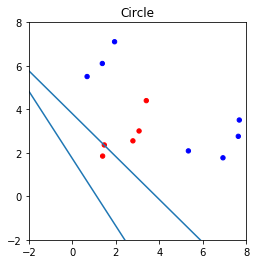

Layer ---------------
[0.0211778889046521, 0.9997757233607656] 2.4942867212293103 2.3860957156749563 0
[0.7566869452735274, 0.6537773832526006] 2.2488916220770547 2.6548056235998416 0
[0.4721603400869446, 0.8815126846784342] 2.2281001840935004 3.20169786686028 0
Layer ---------------
[0.13863378222667477, 0.14053465641243523, 0.3140669267419983] 0.5334129914041947
[0.3350389714885519, 0.21619187290367547, 0.6137373474678646] 0.37394105892463736
>epoch=0, lrate=0.050, error=7.708
line [-2, 8] [5.098598836610945, -3.527499278887003] w [0.12502158548139858, 0.1449341101937856, 0.30460965139781776]
line [-2, 8] [5.457733510331849, -12.173239216905703] w [0.3374668938800712, 0.19140571487512364, 0.5896685390396528]


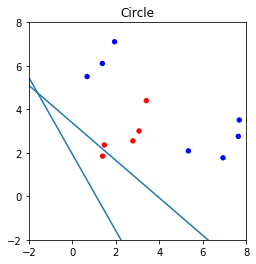

Layer ---------------
[0.017843604718273808, 0.9998407902114506] 2.495065549294825 2.3858287311476536 0
[0.7576567463269044, 0.6526532423464461] 2.2500227306516374 2.654049654608487 0
[0.470182327639362, 0.8825693053667976] 2.231777401033471 3.200192765003978 0
Layer ---------------
[0.12502158548139858, 0.1449341101937856, 0.30460965139781776] 0.48891771465648054
[0.3374668938800712, 0.19140571487512364, 0.5896685390396528] 0.3697075963828433
+++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++
>epoch=1, lrate=0.050, error=11.588
+++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++
>epoch=2, lrate=0.050, error=10.946
+++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++
>epoch=3, lrate=0.050, error=11.209
>epo

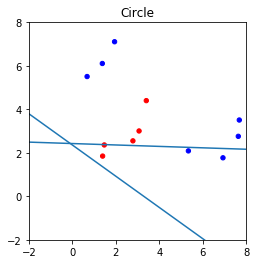

Layer ---------------
[0.9977425195212785, 0.06715552649880183] 2.141218155102795 2.3404757746222584 0
[0.7321054624230013, 0.6811913034459581] 2.533734156593758 2.6310738639708537 0
[0.12360326199793983, 0.9923317155182881] 2.5025760919313966 3.197956077056708 0
Layer ---------------
[0.5721117505091564, 0.7962549179119216, -0.04527041330070894] 1.8771221957161133
[0.03093619994339326, 0.9431936525945319, 0.0033000397101222096] 2.2889152409412703
>epoch=11, lrate=0.050, error=10.752
>epoch=12, lrate=0.050, error=10.682
>epoch=13, lrate=0.050, error=10.609
>epoch=14, lrate=0.050, error=10.532
>epoch=15, lrate=0.050, error=10.452
>epoch=16, lrate=0.050, error=10.368
>epoch=17, lrate=0.050, error=10.280
>epoch=18, lrate=0.050, error=10.189
>epoch=19, lrate=0.050, error=10.094
>epoch=20, lrate=0.050, error=9.995
line [-2, 8] [3.2850025722734637, -3.7253181310877337] w [0.549615260013439, 0.7840087255208141, -0.21664679921082342]
line [-2, 8] [2.6077583240514204, 2.2784037897413363] w [0.0

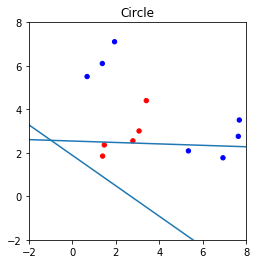

Layer ---------------
[0.9996388401022667, 0.02687358106012449] 2.1317241423750626 2.293575446615574 0
[0.7388716482761051, 0.6738461897004032] 2.5584508501414644 2.6028999641977966 0
[0.12131607801609932, 0.9926139275744581] 2.503474421943015 3.1988172723222457 0
Layer ---------------
[0.549615260013439, 0.7840087255208141, -0.21664679921082342] 1.4762401599938364
[0.02851514809857018, 0.8657888423580475, -0.01257757623658262] 2.200737764332901
>epoch=21, lrate=0.050, error=9.892
>epoch=22, lrate=0.050, error=9.785
>epoch=23, lrate=0.050, error=9.675
>epoch=24, lrate=0.050, error=9.562
>epoch=25, lrate=0.050, error=9.446
>epoch=26, lrate=0.050, error=9.327
>epoch=27, lrate=0.050, error=9.206
>epoch=28, lrate=0.050, error=9.083
>epoch=29, lrate=0.050, error=8.959
>epoch=30, lrate=0.050, error=8.835
line [-2, 8] [2.648297022067123, -4.144491655697481] w [0.5276612521758179, 0.7767962131709691, -0.41989339384162727]
line [-2, 8] [2.7730181644422514, 2.4198211209485456] w [0.0274699832909

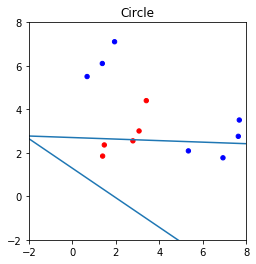

Layer ---------------
[0.9995126314268103, -0.031216976443167316] 2.1232475233170263 2.2446061620435938 0
[0.7298901719468995, 0.6835644350720168] 2.5765353582102626 2.564719714748019 0
[0.10539216835305464, 0.9944307370801856] 2.5079872979592794 3.2002005792669213 0
Layer ---------------
[0.5276612521758179, 0.7767962131709691, -0.41989339384162727] 1.00186459374206
[0.02746998329098227, 0.7777523565672707, -0.02832078106401154] 2.101781445616844
>epoch=31, lrate=0.050, error=8.710
>epoch=32, lrate=0.050, error=8.585
>epoch=33, lrate=0.050, error=8.462
>epoch=34, lrate=0.050, error=8.340
>epoch=35, lrate=0.050, error=8.219
>epoch=36, lrate=0.050, error=8.101
>epoch=37, lrate=0.050, error=7.984
>epoch=38, lrate=0.050, error=7.870
>epoch=39, lrate=0.050, error=7.759
>epoch=40, lrate=0.050, error=7.650
line [-2, 8] [1.9742200203143703, -4.501489707099402] w [0.5123509185669252, 0.7911888273774503, -0.6079465505381136]
line [-2, 8] [3.032526437856677, 2.6278593045647947] w [0.027308016555

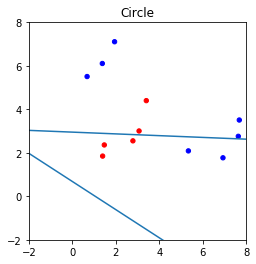

Layer ---------------
[0.9956001491403615, -0.09370348462938852] 2.1172715227100056 2.204799535181075 0
[0.6863146267287655, 0.7273047732128225] 2.5843397498281977 2.5009522522661696 0
[0.05056175014111245, 0.9987209367098838] 2.520416833194637 3.200001797615667 0
Layer ---------------
[0.5123509185669252, 0.7911888273774503, -0.6079465505381136] 0.5372789857237626
[0.027308016555066417, 0.6748266490762774, -0.035611045340178386] 1.9918136211839086
>epoch=41, lrate=0.050, error=7.544
>epoch=42, lrate=0.050, error=7.442
>epoch=43, lrate=0.050, error=7.343
>epoch=44, lrate=0.050, error=7.248
>epoch=45, lrate=0.050, error=7.158
>epoch=46, lrate=0.050, error=7.072
>epoch=47, lrate=0.050, error=6.990
>epoch=48, lrate=0.050, error=6.913
>epoch=49, lrate=0.050, error=6.840
>epoch=50, lrate=0.050, error=6.771
line [-2, 8] [1.3799473546076968, -4.537922047901283] w [0.5045005646948546, 0.8525037143958654, -0.753439093215754]
line [-2, 8] [3.48815712407389, 2.9899542111645925] w [0.0274865492355

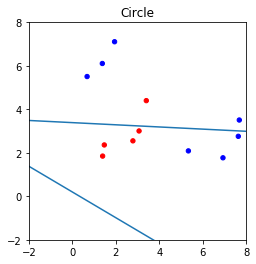

Layer ---------------
[0.9909116385770524, -0.13451440269555173] 2.11412987714751 2.182791884892656 0
[0.6393373581341769, 0.7689263570030691] 2.578725653935918 2.4068788683337417 0
[-0.007991230835175547, 0.9999680696050944] 2.5362194816974664 3.207448735273758 0
Layer ---------------
[0.5045005646948546, 0.8525037143958654, -0.753439093215754] 0.16740911608410064
[0.027486549235524908, 0.5517139407117255, -0.02746424055325641] 1.8694918142734354
>epoch=51, lrate=0.050, error=6.704
>epoch=52, lrate=0.050, error=6.641
>epoch=53, lrate=0.050, error=6.581
>epoch=54, lrate=0.050, error=6.523
>epoch=55, lrate=0.050, error=6.467
>epoch=56, lrate=0.050, error=6.413
>epoch=57, lrate=0.050, error=6.360
>epoch=58, lrate=0.050, error=6.309
>epoch=59, lrate=0.050, error=6.259
>epoch=60, lrate=0.050, error=6.210
line [-2, 8] [0.954880325846468, -4.27168727272471] w [0.5004835113989287, 0.9575758888792506, -0.8578845284519532]
line [-2, 8] [4.4338275504464475, 3.7456464187605065] w [0.0277148971860

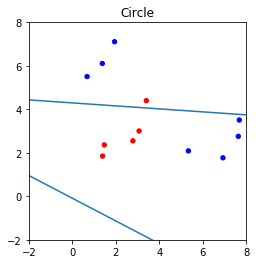

Layer ---------------
[0.9875349404365873, -0.15739994096855944] 2.1124807682579845 2.1713567981336075 0
[0.6255026277694666, 0.7802220598352063] 2.5551161311004704 2.3357245373161266 0
[-0.04056898880315286, 0.9991767396949798] 2.5508954632238927 3.2236651102079774 0
Layer ---------------
[0.5004835113989287, 0.9575758888792506, -0.8578845284519532] -0.0865966460021172
[0.027714897186028965, 0.4027267809294857, -0.009466024413986956] 1.730191302215707
>epoch=61, lrate=0.050, error=6.162
>epoch=62, lrate=0.050, error=6.115
>epoch=63, lrate=0.050, error=6.068
>epoch=64, lrate=0.050, error=6.021
>epoch=65, lrate=0.050, error=5.974
>epoch=66, lrate=0.050, error=5.928
>epoch=67, lrate=0.050, error=5.881
>epoch=68, lrate=0.050, error=5.834
>epoch=69, lrate=0.050, error=5.787
>epoch=70, lrate=0.050, error=5.740
line [-2, 8] [0.6798119939069552, -3.904667033515494] w [0.4980327125597469, 1.0863452740883361, -0.9346014567288731]
line [-2, 8] [7.3924197916533885, 6.121375324413706] w [0.0279506

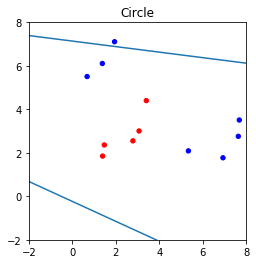

Layer ---------------
[0.9851098163756498, -0.17192629141679772] 2.111454043340953 2.164373709457846 0
[0.61789164938969, 0.7862632571947442] 2.5142843583819756 2.2884476240196854 0
[-0.05925092810502021, 0.998243120446464] 2.5641261315676998 3.2422392035208327 0
Layer ---------------
[0.4980327125597469, 1.0863452740883361, -0.9346014567288731] -0.25755487827010426
[0.02795063101918889, 0.21990285737122217, 0.016262503061249895] 1.569712973033777
>epoch=71, lrate=0.050, error=5.692
>epoch=72, lrate=0.050, error=5.643
>epoch=73, lrate=0.050, error=5.594
>epoch=74, lrate=0.050, error=5.544
>epoch=75, lrate=0.050, error=5.493
>epoch=76, lrate=0.050, error=5.441
>epoch=77, lrate=0.050, error=5.388
>epoch=78, lrate=0.050, error=5.335
>epoch=79, lrate=0.050, error=5.280
>epoch=80, lrate=0.050, error=5.224
line [-2, 8] [0.5004608186139138, -3.5492275567442695] w [0.49632729423121696, 1.2255937944541677, -0.9945182386897359]
line [-2, 8] [-277.4752266285975, -223.22799179545373] w [0.02821448

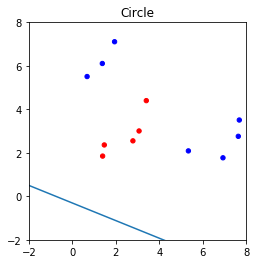

Layer ---------------
[0.9832524265937608, -0.1822489111009476] 2.1107333161348 2.159538504065948 0
[0.6136187087918891, 0.7896024824052764] 2.455426091696782 2.2615735919292708 0
[-0.07130363169025786, 0.9974546566675501] 2.5760662232796414 3.260636490264293 0
Layer ---------------
[0.49632729423121696, 1.2255937944541677, -0.9945182386897359] -0.3792929148017683
[0.028214485703105297, -0.005201091961625096, 0.0508592937294309] 1.3867451993618898
>epoch=81, lrate=0.050, error=5.167
>epoch=82, lrate=0.050, error=5.109
>epoch=83, lrate=0.050, error=5.050
>epoch=84, lrate=0.050, error=4.990
>epoch=85, lrate=0.050, error=4.929
>epoch=86, lrate=0.050, error=4.867
>epoch=87, lrate=0.050, error=4.804
>epoch=88, lrate=0.050, error=4.740
>epoch=89, lrate=0.050, error=4.676
>epoch=90, lrate=0.050, error=4.610
line [-2, 8] [0.37741994592505707, -3.24158993072587] w [0.4950331597275595, 1.3678690487180123, -1.0436103695831123]
line [-2, 8] [-4.545122415036209, -3.505415479275659] w [0.02853296353

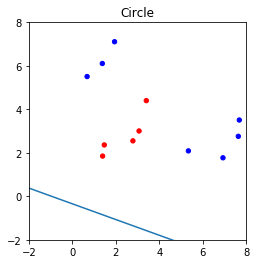

Layer ---------------
[0.9817513510266238, -0.19016909516900726] 2.110189584473775 2.155909496137679 0
[0.612310346673188, 0.7906175050914067] 2.3771047234345013 2.2567573284121356 0
[-0.07973766849426116, 0.9968158828104112] 2.586991948721811 3.278373187752006 0
Layer ---------------
[0.4950331597275595, 1.3678690487180123, -1.0436103695831123] -0.4738052570554075
[0.02853296353198959, -0.2744327516784102, 0.09654487554756189] 1.1902645240096288
>epoch=91, lrate=0.050, error=4.544
>epoch=92, lrate=0.050, error=4.477
>epoch=93, lrate=0.050, error=4.411
>epoch=94, lrate=0.050, error=4.343
>epoch=95, lrate=0.050, error=4.276
>epoch=96, lrate=0.050, error=4.209
>epoch=97, lrate=0.050, error=4.142
>epoch=98, lrate=0.050, error=4.075
>epoch=99, lrate=0.050, error=4.009
>epoch=100, lrate=0.050, error=3.944
line [-2, 8] [0.28730452192689154, -2.986905387361513] w [0.49399094528761267, 1.5087332790919732, -1.0851748739539306]
line [-2, 8] [-1.870059155897545, -1.3630372625094977] w [0.02893018

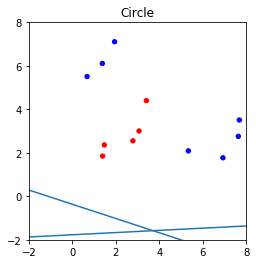

Layer ---------------
[0.9804895536750589, -0.19657119609465687] 2.1097602868465524 2.1530367461033513 0
[0.6132073057599272, 0.789922021570896] 2.281076837791879 2.273895028474501 0
[-0.08566991576321425, 0.9963235747151242] 2.5971661024720705 3.295664737865033 0
Layer ---------------
[0.49399094528761267, 1.5087332790919732, -1.0851748739539306] -0.5545159971105146
[0.02893018027212606, -0.5705903561443343, 0.15468985158130474] 1.0091773592303013
>epoch=101, lrate=0.050, error=3.879
>epoch=102, lrate=0.050, error=3.815
>epoch=103, lrate=0.050, error=3.752
>epoch=104, lrate=0.050, error=3.691
>epoch=105, lrate=0.050, error=3.630
>epoch=106, lrate=0.050, error=3.571
>epoch=107, lrate=0.050, error=3.513
>epoch=108, lrate=0.050, error=3.456
>epoch=109, lrate=0.050, error=3.401
>epoch=110, lrate=0.050, error=3.348
line [-2, 8] [0.21720174228642586, -2.7801090246708826] w [0.4931168065595842, 1.645197461657161, -1.1211301281593726]
line [-2, 8] [-1.0935026610652174, -0.7512714162907619] w 

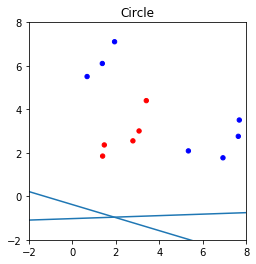

Layer ---------------
[0.9793993078780534, -0.2019331466797615] 2.109410425728118 2.150677833567508 0
[0.6146749059492348, 0.7887805524962563] 2.1764715308474942 2.3019775121766455 0
[-0.08948086932148598, 0.9959885411115287] 2.6067128415081076 3.3126979206370613 0
Layer ---------------
[0.4931168065595842, 1.645197461657161, -1.1211301281593726] -0.6288938580420277
[0.029406717457116587, -0.8592645442556482, 0.22326621489773182] 0.8807946307883096
>epoch=111, lrate=0.050, error=3.295
>epoch=112, lrate=0.050, error=3.244
>epoch=113, lrate=0.050, error=3.195
>epoch=114, lrate=0.050, error=3.146
>epoch=115, lrate=0.050, error=3.099
>epoch=116, lrate=0.050, error=3.054
>epoch=117, lrate=0.050, error=3.009
>epoch=118, lrate=0.050, error=2.966
>epoch=119, lrate=0.050, error=2.924
>epoch=120, lrate=0.050, error=2.884
line [-2, 8] [0.16055020541474652, -2.6126241585516228] w [0.4923663410605959, 1.7754611735137433, -1.1525513114240513]
line [-2, 8] [-0.7867303836672991, -0.5184882686853167] w

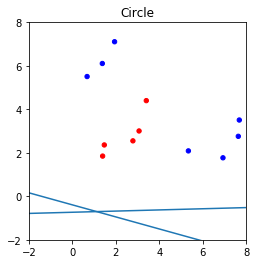

Layer ---------------
[0.9784419987565136, -0.20652180289102348] 2.1091189361192235 2.1486947363439524 0
[0.6153386317884476, 0.7882628801540266] 2.07575686948683 2.326419058943303 0
[-0.09178823252634576, 0.9957785498642202] 2.6156272922778108 3.329251119642001 0
Layer ---------------
[0.4923663410605959, 1.7754611735137433, -1.1525513114240513] -0.6996820260076534
[0.02992963750314353, -1.1157695168468935, 0.2967091195313295] 0.8179505050669463
>epoch=121, lrate=0.050, error=2.844
>epoch=122, lrate=0.050, error=2.805
>epoch=123, lrate=0.050, error=2.768
>epoch=124, lrate=0.050, error=2.731
>epoch=125, lrate=0.050, error=2.695
>epoch=126, lrate=0.050, error=2.660
>epoch=127, lrate=0.050, error=2.626
>epoch=128, lrate=0.050, error=2.593
>epoch=129, lrate=0.050, error=2.561
>epoch=130, lrate=0.050, error=2.529
line [-2, 8] [0.11402489274342663, -2.475455698799006] w [0.49171542334348317, 1.8988959598673467, -1.180095663776473]
line [-2, 8] [-0.6487267057863049, -0.4208718150472974] w [0

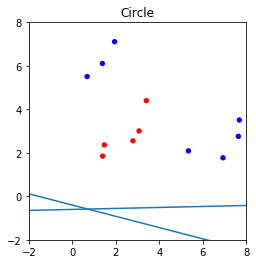

Layer ---------------
[0.9775955998095591, -0.210491907761292] 2.108872505131014 2.1470049428011637 0
[0.6149153597220726, 0.7885931145894403] 1.986366903780072 2.342868723824118 0
[-0.09346826547336679, 0.9956222593681803] 2.6238830756969103 3.3449024760033694 0
Layer ---------------
[0.49171542334348317, 1.8988959598673467, -1.180095663776473] -0.766909438532166
[0.030456584806695726, -1.3366658362221293, 0.3691331814619702] 0.806217655056087
>epoch=131, lrate=0.050, error=2.499
>epoch=132, lrate=0.050, error=2.468
>epoch=133, lrate=0.050, error=2.439
>epoch=134, lrate=0.050, error=2.410
>epoch=135, lrate=0.050, error=2.382
>epoch=136, lrate=0.050, error=2.354
>epoch=137, lrate=0.050, error=2.327
>epoch=138, lrate=0.050, error=2.301
>epoch=139, lrate=0.050, error=2.275
>epoch=140, lrate=0.050, error=2.250
line [-2, 8] [0.0754991944854123, -2.3612993021976716] w [0.49114738806255653, 2.0155437092196813, -1.204336150996305]
line [-2, 8] [-0.5807066954716287, -0.37811662873652063] w [0.

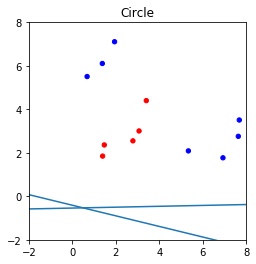

Layer ---------------
[0.9768441019337694, -0.2139523323481372] 2.1086617429406243 2.1455509145474934 0
[0.613791121762381, 0.789468466023614] 1.9097038357382417 2.354491979922282 0
[-0.09510221904072813, 0.9954675122441361] 2.6314751273548502 3.3593673670427564 0
Layer ---------------
[0.49114738806255653, 2.0155437092196813, -1.204336150996305] -0.830122849628887
[0.030959066511136838, -1.5281631034564316, 0.43680395057495797] 0.8254964129275794
>epoch=141, lrate=0.050, error=2.225
>epoch=142, lrate=0.050, error=2.200
>epoch=143, lrate=0.050, error=2.177
>epoch=144, lrate=0.050, error=2.153
>epoch=145, lrate=0.050, error=2.130
>epoch=146, lrate=0.050, error=2.108
>epoch=147, lrate=0.050, error=2.086
>epoch=148, lrate=0.050, error=2.064
>epoch=149, lrate=0.050, error=2.043
[0, 1]
[2.7810836, 2.550537003, 0] [0.7631644493672717, 0.3154265836174243]
[1.465489372, 2.362125076, 0] [0.7375195670764827, 0.3370856730820678]
[3.396561688, 4.400293529, 0] [0.7471455534556938, 0.329282955491528

In [34]:
T = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
    [0.673756466,5.508563011,1],
    [1.373756466,6.108563011,1],
    [1.93756466,7.108563011,1] 
    ]
n_inputs = len(T[0]) - 1
network = SSNN_network(n_inputs, ['S','S','S'],['L','L'],[0,1])
network.train_network( T, 0.05, 150, 10)
network.test_network(T)

In [51]:
print ([x[1] for x in T])

[2.550537003, 2.362125076, 4.400293529, 1.850220317, 3.005305973, 2.759262235, 2.088626775, 1.77106367, -0.242068655, 3.508563011, 5.508563011, 6.108563011, 7.108563011]
